In [2]:
from pantograph_library import PantographModel
import numpy as np

model = PantographModel()

q = np.array([np.pi/1.5, np.pi/4]) + 1/2 * np.random.rand(2)
print('q = ', q)
p = model.fk(q)
print('p = ', p)

est_q = model.ik(p)
print('est_q = ', est_q)

J = model.jacobian(q)
print('J = \n', J)

dq = 1e-6
dp_1 = (model.fk(q + np.array([dq, 0])) - model.fk(q))/dq
dp_2 = (model.fk(q + np.array([0, dq])) - model.fk(q))/dq
est_J = np.array([[dp_1[0], dp_2[0]], [dp_1[1], dp_2[1]]])
print('est_J = \n', est_J)

q =  [2.57804845 0.85477944]
p =  [0.0223071  0.17915401]
est_q =  [ 2.57804845  1.7116016   1.36460016 -2.46190016  0.85477944]
theta_2 =  49.643747428334855 rad
vect 43 =  [-0.1283314   0.10371139] rad
theta_4 =  141.0564889501362 rad
J = 
 [[-0.06225225 -0.07617618]
 [-0.07703029  0.06473079]]
est_J = 
 [[-0.06225222 -0.0761762 ]
 [-0.0770303   0.06473076]]


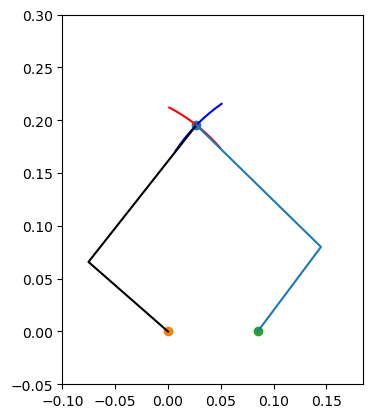

In [13]:
import matplotlib.pyplot as plt

q_vars = np.pi/10
N = 10
span_q1 = np.array([
    np.linspace(q[0] - q_vars, q[0] + q_vars, N),
    np.ones(N)*q[1]
])
span_q2 = np.array([
    np.ones(N)*q[0],
    np.linspace(q[1] - q_vars, q[1] + q_vars, N)
])

p_span_q1 = np.zeros((2, N))
p_span_q2 = np.zeros((2, N))
for i in range(N):
    p_span_q1[:, i] = model.fk(span_q1[:, i])
    p_span_q2[:, i] = model.fk(span_q2[:, i])

plt.figure()
plt.gca().set_aspect('equal')
plt.plot(p_span_q1[0], p_span_q1[1], 'b')
plt.plot(p_span_q2[0], p_span_q2[1], 'r')
plt.scatter(p[0], p[1])
plt.xlim((-0.1, model.a5 + 0.1))
plt.ylim((-0.05, 0.3))


# Coordinates of P2 with respect to P1
x2 = model.a1 * np.cos(q[0])
y2 = model.a1 * np.sin(q[0])
# Coordinates of P4 with respect to P1
x4 = model.a4 * np.cos(q[1]) + model.a5
y4 = model.a4 * np.sin(q[1])
plt.scatter([0.0], [0.0])
plt.scatter([model.a5], [0.0])
plt.plot([0, x2, p[0]], [0, y2, p[1]], 'k')
plt.plot([model.a5, x4, p[0]], [0, y4, p[1]])

In [5]:
J @ np.array([[0], [1]])

array([[-0.07617618],
       [ 0.06473079]])

In [3]:
P3 = p
P5 = np.array([0 + model.a5, 0.0])
alpha_5 = np.arccos(
    (model.a4**2 + np.linalg.norm(P3 - P5)**2 - model.a3**2)
    / (2 * model.a4 * np.linalg.norm(P3 - P5))
)
beta_5 = np.arctan2(P3[1], P3[0] - P5[0])
q5 = beta_5 - alpha_5

print('alpha_5 = ', alpha_5 * 180 / np.pi, ' rad')
print('beta_5 = ', beta_5 * 180 / np.pi, ' rad')
print('q5 = ', q5 * 180 / np.pi, ' rad')

alpha_5 =  58.3244218768547  rad
beta_5 =  109.15181740116421  rad
q5 =  50.827395524309516  rad
